# importar recursos

In [6]:
#!pip install -U spacy
#!python -m spacy download es_core_news_sm
#!python -m spacy download es_core_news_lg
#!pip install torch
#!pip install torchvision
#!pip install transformers
#!pip install beautifulsoup4
#!pip install wordcloud
#!pip install gensim
#!pip install pandas
#!pip install lime

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.1/12.9 MB 648.1 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.9 MB 726.2 kB/s eta 0:00:18
      --------------------------------------- 0.2/12.9 MB 1.0 MB/s eta 0:00:13
     - -------------------------------------- 0.3/12.9 MB 1.4 MB/s eta 0:00:09
     - -------------------------------------- 0.5/12.9 MB 1.7 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/12.9 MB 2.1 MB/s eta 0:00:06
     -- ------------------------------------- 0.9/12.9 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/12.9 MB 2.4 MB/s eta 0:00:05
     --- ------------------------------------ 1.3/12.9 MB 2.6 MB/s eta 0:00:05
     ---- ----------------------------------- 1.4/12.9 MB 2.6 MB/s eta 0:00:05
     ----- ---------------------------------- 1.6/12.9 MB 2.7 MB

In [7]:
import requests
from bs4 import BeautifulSoup
import csv
import os
import re
import csv
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Definir la ruta del archivo en el escritorio
archivo_csv = os.path.join(os.path.expanduser("~"), "Escritorio", "datos_extraidos.csv")

# Bases de datos periodico la republica 

In [52]:
# Lista de URLs de la base de datos la republica
BASE_DATOS_republica= [
"https://www.larepublica.co/analisis/eduardo-verano-de-la-rosa-500119/cultura-de-paz-3698259",
"https://www.larepublica.co/redirect/post/3623164",
"https://www.larepublica.co/redirect/post/3601143",
"https://www.larepublica.co/redirect/post/3598667",
"https://www.larepublica.co/redirect/post/3562175",
"https://www.larepublica.co/redirect/post/3556130",
"https://www.larepublica.co/redirect/post/3554692"
]

# Lista para almacenar los datos extraídos
datos_extraidos = []

nombre_periodico = "La republica"

# Iterar sobre cada URL de la base de datos
for URL_BASE in BASE_DATOS_republica:
    pedido_obtenido = requests.get(URL_BASE)
    html_obtenido = pedido_obtenido.text
    soup = BeautifulSoup(html_obtenido, "html.parser")

     # Encontrar los elementos <div> con la clase "font--secondary"
    divs = soup.find_all(class_="html-content")

    # Crear una lista para almacenar los textos del artículo
    texto_articulo = []
    for div in divs:
        texto_articulo.append(div.text.strip())

    # Unir todos los textos del artículo en una cadena
    articulo_completo = " ".join(texto_articulo)

    # Extraer autor
    autor_div = soup.find("div", class_="autorCargo")
    autor = autor_div.find("a", class_="analistaName").text.strip() if autor_div and autor_div.find("a", class_="analistaName") else "Autor no encontrado"

    # Extraer fecha de publicación
    fecha_span = soup.find("span", class_="date-news")
    fecha = fecha_span.text.strip() if fecha_span else "Fecha no encontrada"

    # Contar el número de palabras del artículo
    num_palabras = len(articulo_completo.split())

    # Agregar los datos extraídos a la lista
    datos_extraidos.append([autor, fecha, num_palabras, articulo_completo])

# Crear el DataFrame de pandas con las columnas originales
columnas = ["Autor", "Fecha de Publicación", "Número de Palabras", "Texto del Artículo"]
df = pd.DataFrame(datos_extraidos, columns=columnas)

# Añadir el nombre del periódico a cada entrada
df["Nombre del Periódico"] = nombre_periodico

# Eliminar la columna de texto del artículo
df = df.drop(columns=["Texto del Artículo"])

# Mostrar las tres primeras filas del DataFrame
print(df)

# Escribir los datos extraídos en un archivo CSV
with open('datos_extraidoslarepublica_descriptivo.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Escribir la cabecera
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Escribir los datos
    for index, row in df.iterrows():
        escritor_csv.writerow(row)

                        Autor Fecha de Publicación  Número de Palabras  \
0   Eduardo Verano de la Rosa           07/09/2023                 565   
1       Juan Manuel Nieves R.           26/05/2023                 487   
2       Juan Fernando Samudio           26/04/2023                 566   
3   Alfredo Sarmiento Narváez           22/04/2023                 511   
4  Luis Felipe Gómez Restrepo           07/03/2023                 608   
5             Carlos Ronderos           28/02/2023                 595   
6     Rosmery Quintero Castro           25/02/2023                 468   

  Nombre del Periódico  
0         La republica  
1         La republica  
2         La republica  
3         La republica  
4         La republica  
5         La republica  
6         La republica  


# Analisis descriptivo

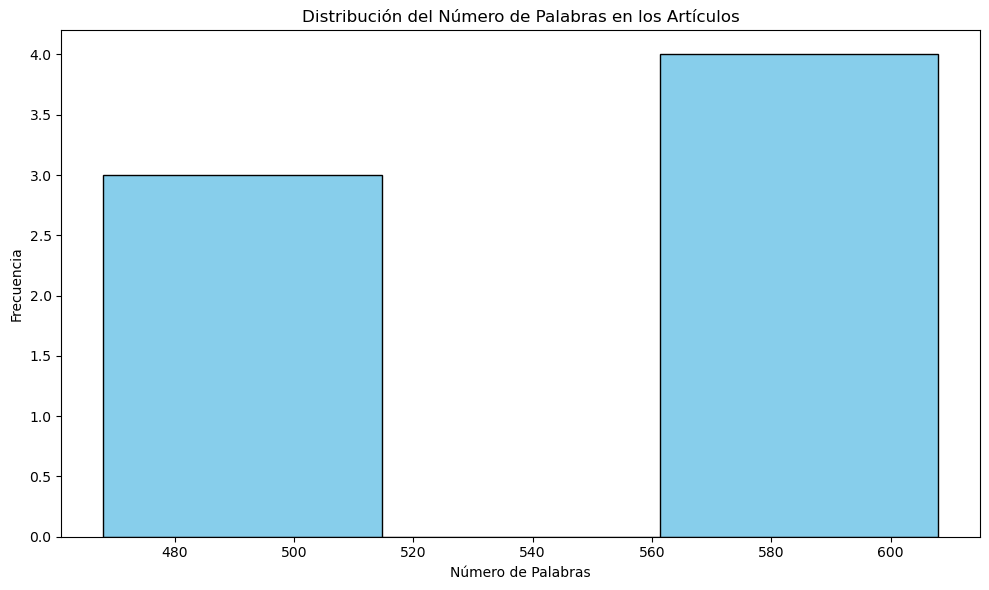

In [53]:
# Gráfica 1: Distribución del Número de Palabras
plt.figure(figsize=(10, 6))
plt.hist(df['Número de Palabras'], bins=3, color='skyblue', edgecolor='black')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.title('Distribución del Número de Palabras en los Artículos')
plt.tight_layout()
plt.show()

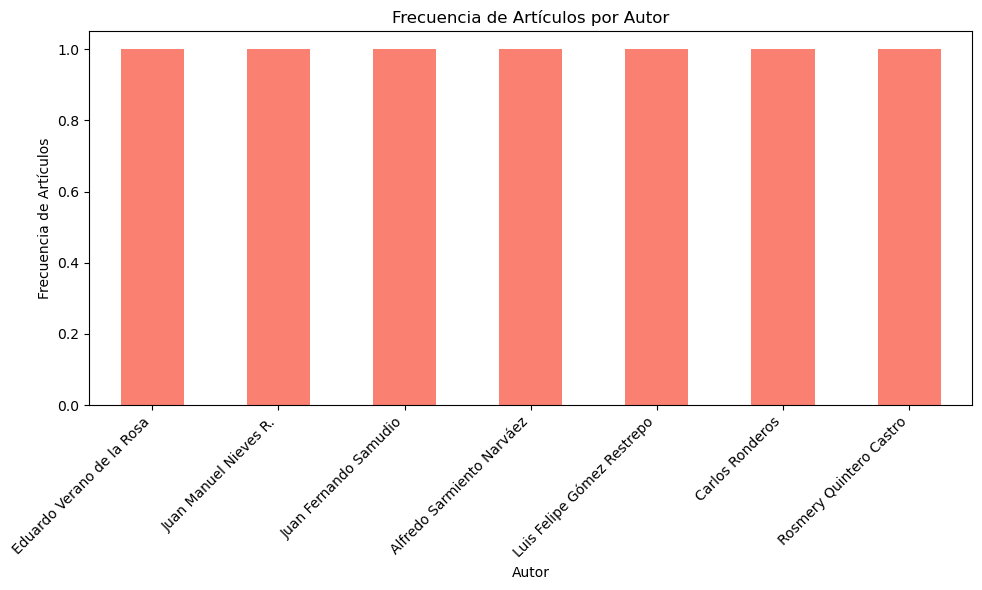

In [54]:
# Gráfica 2: Frecuencia de artículos por autor
plt.figure(figsize=(10, 6))
df['Autor'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Autor')
plt.ylabel('Frecuencia de Artículos')
plt.title('Frecuencia de Artículos por Autor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
# Función para convertir la fecha al formato DD/MM/YYYY
def convertir_a_formato_completo(fecha):
    return pd.to_datetime(fecha, format='%d/%m/%Y').strftime('%Y-%m-%d %H:%M:%S')

# Aplicar la conversión de fechas
df['Fecha de Publicación'] = df['Fecha de Publicación'].apply(convertir_a_formato_completo)

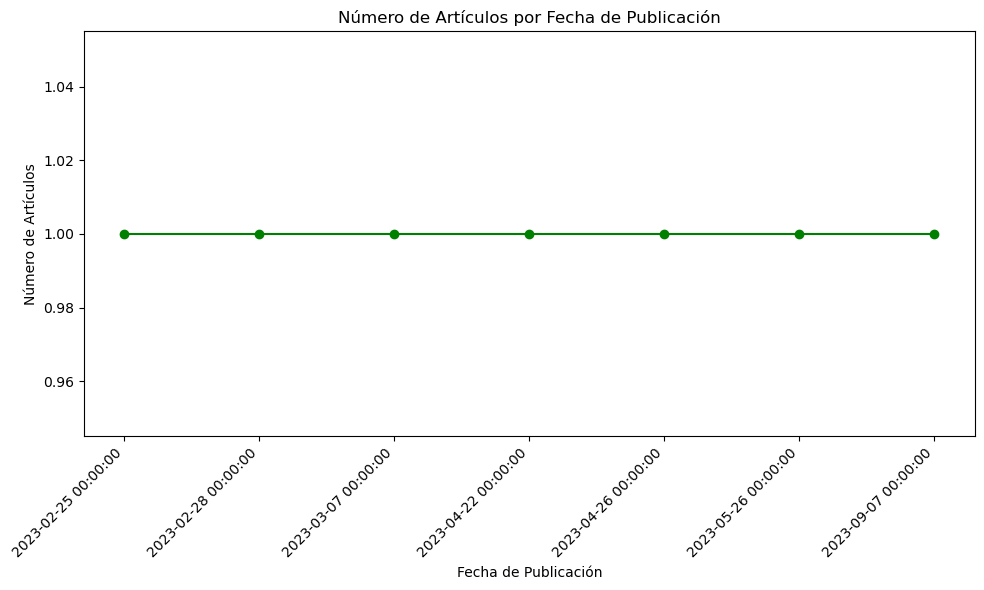

In [57]:
plt.figure(figsize=(10, 6))
df['Fecha de Publicación'].value_counts().sort_index().plot(kind='line', marker='o', linestyle='-', color='green')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Número de Artículos')
plt.title('Número de Artículos por Fecha de Publicación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
# Write the data to a CSV file using csv.writer
with open('datos_extraidoslarepublica_descriptivo.csv', 'w', newline='', encoding='utf-8-sig') as archivo:
    escritor_csv = csv.writer(archivo)
    # Write the header
    escritor_csv.writerow(["Autor", "Fecha de Publicación", "Número de Palabras", "Nombre del Periódico"])
    # Write the data
    for index, row in df2.iterrows():
        escritor_csv.writerow(row.values)
